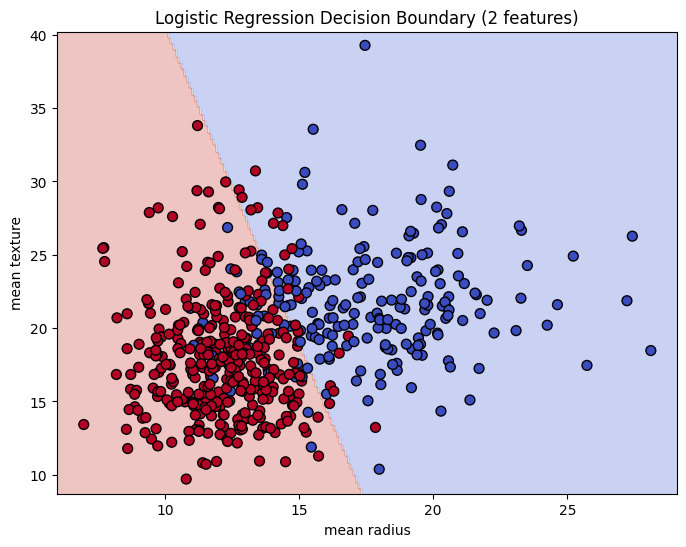

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, :2]  # Use first 2 features for visualization
y = breast_cancer.target

# Optionally, you can pick specific features like 'mean radius' and 'mean texture':
# X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)[['mean radius','mean texture']].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train Logistic Regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Create meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel(breast_cancer.feature_names[0])  # Feature 1
plt.ylabel(breast_cancer.feature_names[1])  # Feature 2
plt.title('Logistic Regression Decision Boundary (2 features)')
plt.show()
